In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
smoker=pd.read_csv("Smoker Data.csv")


## **Identifying Missing Values**

In [ ]:
#Finding the missing values for each variable

missing_values = smoker.isnull().sum()
print(missing_values)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


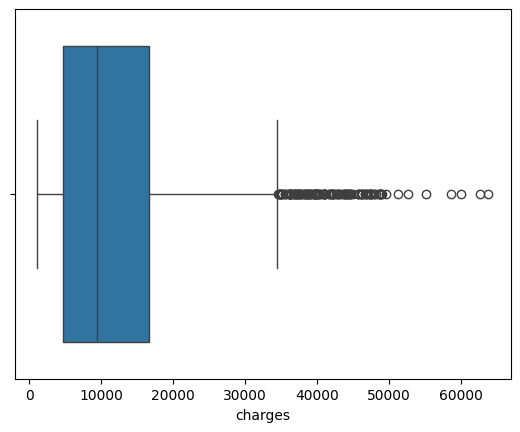

In [ ]:
#Finding Outliers
import matplotlib.pyplot as plt
sns.boxplot(x=smoker['charges'])
plt.show()


In [ ]:
#Treating outliers

Q1 = smoker['charges'].quantile(0.25)
Q3 = smoker['charges'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

smoker['charges'] = smoker['charges'].clip(lower=lower_bound, upper=upper_bound)


# **Descriptive statistic for DATA**

In [ ]:
smoker.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,12479.369251
std,14.049960,6.098187,1.205493,10158.056096
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,34489.350562


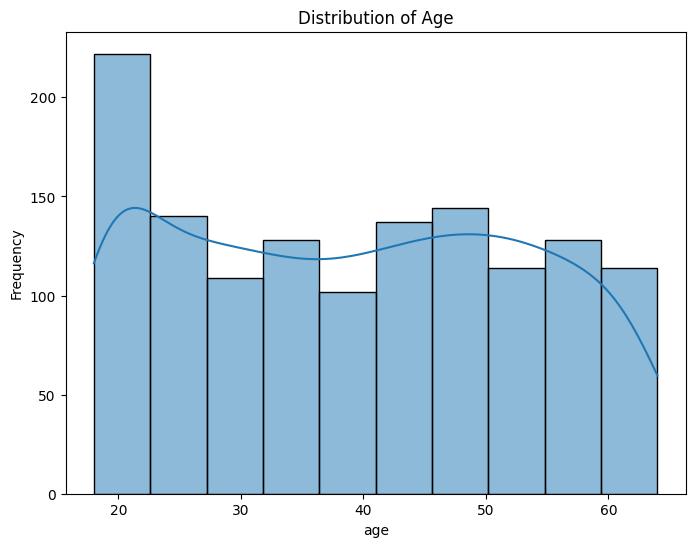

In [ ]:
# Distribution of Age
plt.figure(figsize=(8,6))
sns.histplot(smoker['age'], bins=10, kde=True)
plt.title("Distribution of Age")
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()


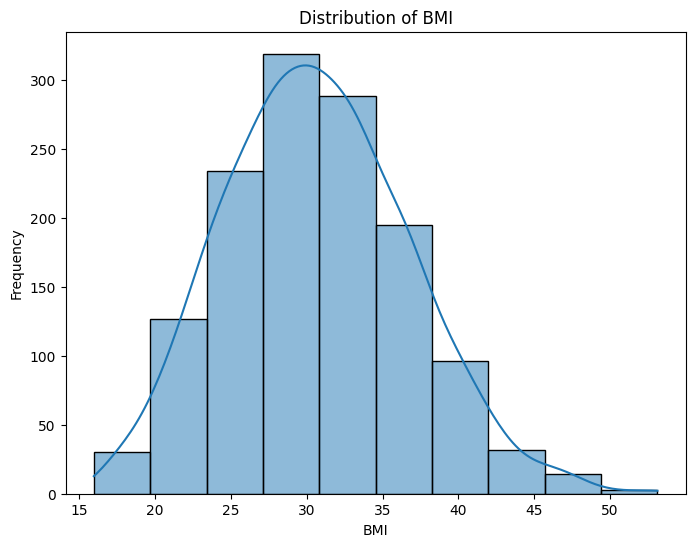

In [ ]:
#Distribution of BMI
plt.figure(figsize=(8,6))
sns.histplot(smoker["bmi"], bins=10, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

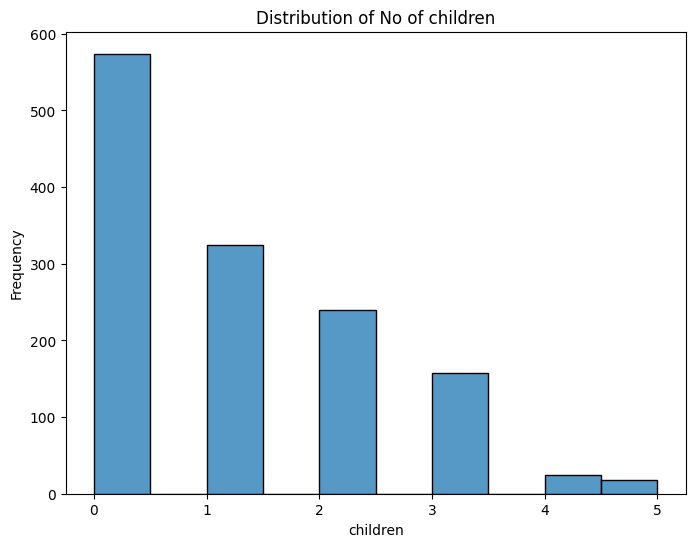

In [ ]:
#Distribution of number of children
plt.figure(figsize=(8,6))
sns.histplot(smoker["children"],bins=10)
plt.title("Distribution of No of children")
plt.xlabel("children")
plt.ylabel("Frequency")
plt.show()

<ipython-input-117-e585138c5942>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = smoker['sex'], palette = 'rainbow')


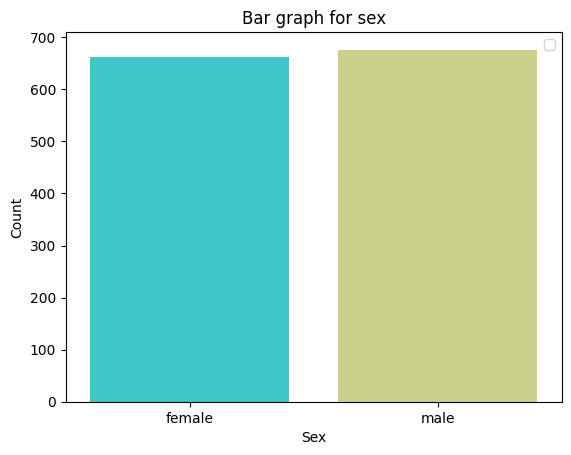

In [ ]:
sns.countplot(x = smoker['sex'], palette = 'rainbow')
plt.title('Bar graph for sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend()
plt.show()


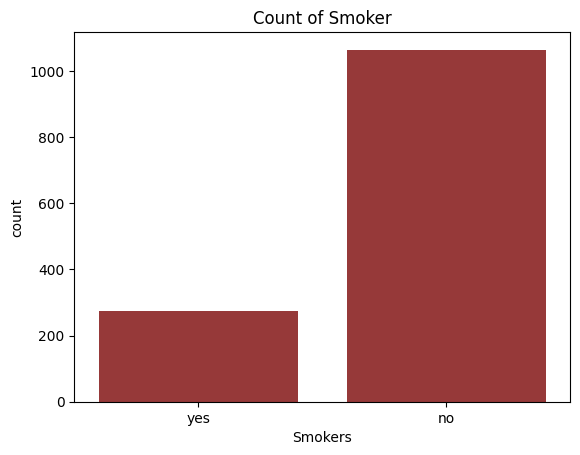

In [ ]:
sns.countplot(x=smoker["smoker"],color= "brown")
plt.title('Count of Smoker')
plt.xlabel("Smokers")
plt.ylabel("count")
plt.show()

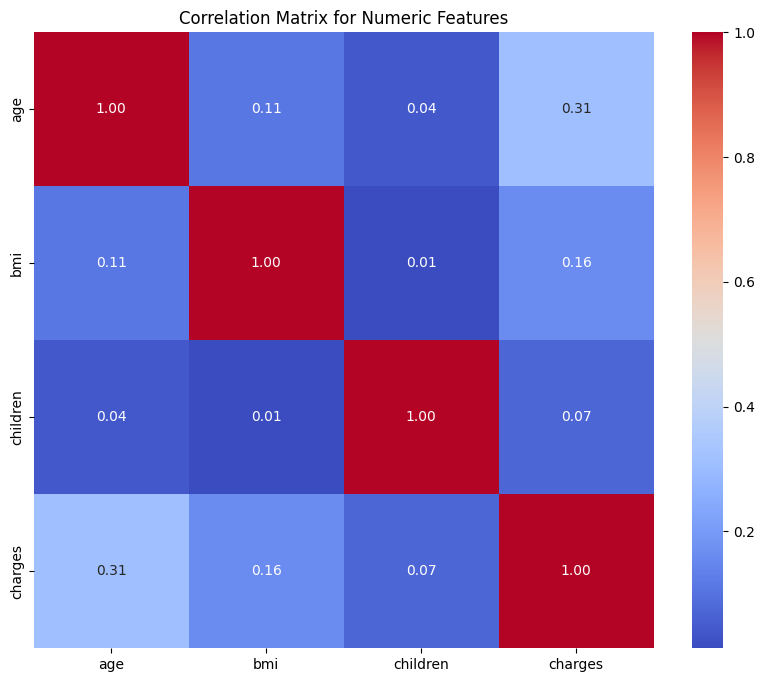

In [ ]:
numeric_features = smoker.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numeric Features")
plt.show()


## **Creating Evaluation function**

In [ ]:
def evaluation_function(y, yhat):
    ei = y - yhat

    ei2 = ei ** 2

    MSE = ei2.mean()
    RMSE = MSE ** 0.5

    ei_abs = ei.abs()
    MAE = ei_abs.mean()

    SSR = ((yhat - y.mean())**2).sum()
    SSE = ei2.sum()
    SST = ((y - y.mean())**2).sum()
    R2 = 1 - (SSE/SST)

    print("MSE: ", MSE)
    print("RMSE: ", RMSE)
    print("MAE: ", MAE)
    print("R^2: ", R2)

# **Creating Dummy Variables**

In [ ]:
smoker_dummies = pd.get_dummies(smoker[['region', 'sex', 'smoker']], drop_first=True)
smoker = pd.concat([smoker, smoker_dummies], axis=1)


In [ ]:
smoker.drop(columns=['sex', 'region', 'smoker'], axis=1, inplace=True)

# **Data Normalization**

In [ ]:
encoded_data = pd.get_dummies(data, drop_first=True)

scaler = StandardScaler()
encoded_data[['age', 'bmi', 'charges']] = scaler.fit_transform(encoded_data[['age', 'bmi', 'charges']])

encoded_data.head()

In [ ]:
smoker

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,False,True,False,True
1,18,33.770,1,1725.55230,False,True,False,True,False
2,28,33.000,3,4449.46200,False,True,False,True,False
3,33,22.705,0,21984.47061,True,False,False,True,False
4,32,28.880,0,3866.85520,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,False,True,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,True,False,False,False
1336,21,25.800,0,2007.94500,False,False,True,False,False


## **Multiple Regression Model**

In [ ]:
#Defining X and y value for models
X=smoker.drop(columns='charges')
y=smoker['charges']

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True) # Shuffling the data

In [ ]:
model_linear=LinearRegression()
model_linear.fit(X,y)

print("The slope of the model: ",model_linear.coef_)
print("---------------------------------------------------------------")

print("The Intercept of the model: ",model_linear.intercept_)

The slope of the model:  [  228.71840855   219.54548999   440.41299981  -409.69398384
 -1018.79880372  -934.20947825  -166.87419128 19993.4423432 ]
---------------------------------------------------------------
The Intercept of the model:  -7108.6419091796415


In [ ]:
y_train_hat=model_linear.predict(X_train)
y_test_hat=model_linear.predict(X_test)

In [ ]:
print("The evaluation of training data")
evaluation_function(y_train,y_train_hat)
print('-----------------------------------------------------')
print("The evaluation od the Testing data")
evaluation_function(y_test,y_test_hat)


The evaluation of training data
MSE:  26752601.71432267
RMSE:  5172.2917274959145
MAE:  3356.2487466972993
R^2:  0.736962286311168
-----------------------------------------------------
The evaluation od the Testing data
MSE:  23008568.469415214
RMSE:  4796.724764817679
MAE:  3233.635263628185
R^2:  0.7880498618358283


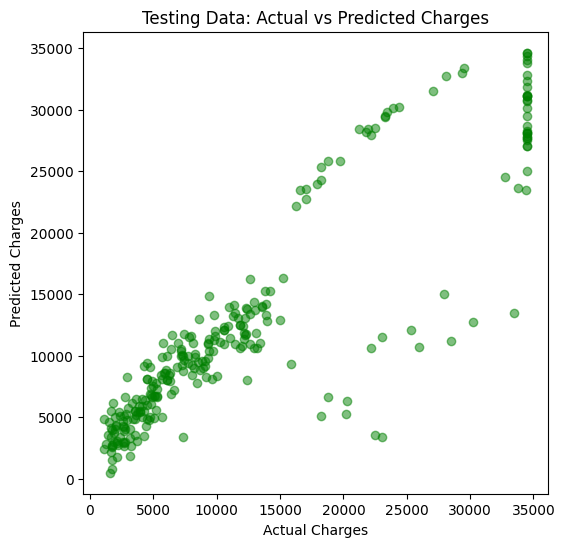

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test,y_test_hat, color='green', alpha=0.5)
plt.title('Testing Data: Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

# **Quadratic Regression** **(Non-Linear Regression)**

In [ ]:
X=smoker.drop(columns='charges')
y=smoker['charges']


In [ ]:
# Create quadratic features (degree 2)
poly = PolynomialFeatures(degree=2)
X_quad = poly.fit_transform(X)

# Train-test split
X_train_quad, X_test_quad, y_train, y_test = train_test_split(X_quad, y, test_size=0.2, random_state=42, shuffle=True)

# Train the model
quad_reg = LinearRegression()
quad_reg.fit(X_train_quad, y_train)

# Predictions
y_pred_train_quad = quad_reg.predict(X_train_quad)
y_pred_test_quad = quad_reg.predict(X_test_quad)

In [ ]:
print("Evaluation of train data")
evaluation_function(y_train,y_pred_train_quad)
print('-'*30)
print("Evaluation of test data")
evaluation_function(y_test, y_pred_test_quad)


Evaluation of train data
MSE:  19914607.314075086
RMSE:  4462.578549905322
MAE:  2714.8507274929902
R^2:  0.8041950150178945
------------------------------
Evaluation of test data
MSE:  19887978.461644612
RMSE:  4459.593979460979
MAE:  2662.9024208731344
R^2:  0.8167960867120047


### **Decision Tree and KNN**

In [ ]:
X=smoker.drop(columns=["charges"])
y=smoker["charges"]

In [ ]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
kn_model=KNeighborsRegressor(n_neighbors=3, weights='distance')
kn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [ ]:
# Decision Tree regressor
dt_model=DecisionTreeRegressor(max_depth=2,random_state=30)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=30)

In [ ]:
#Predicting

y_pred_kn_test=kn_model.predict(X_test)
y_pred_kn_train=kn_model.predict(X_train)

y_pred_dt_test=dt_model.predict(X_test)
y_pred_dt_train=dt_model.predict(X_train)

In [ ]:
# Evaluation of Model
print("evalutaion of KNN")
print('-'*30)
print("evaluation of test data")
evaluation_function(y_test,y_pred_kn_test)
print('-'*30)
print("evaluation of train data")
evaluation_function(y_train,y_pred_kn_train)

print('-'*30)
print("evaluation of Decision tree")
print('-'*30)
print("evaluation of test data")
evaluation_function(y_test,y_pred_dt_test)
print('-'*30)
print("evaluation of train data")
evaluation_function(y_train,y_pred_kn_train)

evalutaion of KNN
------------------------------
evaluation of test data
MSE:  81129943.39036822
RMSE:  9007.216184280704
MAE:  5814.066254474178
R^2:  0.252647867523893
------------------------------
evaluation of train data
MSE:  244239.5543823394
RMSE:  494.20598375812835
MAE:  29.572515327102803
R^2:  0.9975985807039203
------------------------------
evaluation of Decision tree
------------------------------
evaluation of test data
MSE:  21222637.210045774
RMSE:  4606.803361339159
MAE:  2810.698726696423
R^2:  0.8045014884408574
------------------------------
evaluation of train data
MSE:  244239.5543823394
RMSE:  494.20598375812835
MAE:  29.572515327102803
R^2:  0.9975985807039203


# **Random Forest**

In [ ]:

# Separate features and target
X = smoker.drop(columns=["charges"])
y = smoker["charges"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting using the model
y_pred_rf_test = rf_model.predict(X_test)
y_pred_rf_train = rf_model.predict(X_train)

# Evaluate the model performance
print("Evaluation of Random Forest model:")
print("-" * 30)
print("Evaluation of train data:")
evaluation_function(y_train, y_pred_rf_train)

print("-"*30)
print("Evaluation of test data:")
evaluation_function(y_test, y_pred_rf_test)



Evaluation of Random Forest model:
------------------------------
Evaluation of train data:
MSE:  3426944.0175059726
RMSE:  1851.2006961715342
MAE:  976.6952460069682
R^2:  0.9663055007161492
------------------------------
Evaluation of test data:
MSE:  18105553.097742934
RMSE:  4255.06205568649
MAE:  2222.5760883394987
R^2:  0.833215417738551


In [ ]:
X = smoker.drop(columns=["charges"])
y = smoker["charges"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Piecewise Regression**

In [ ]:

data = pd.read_csv('Smoker Data.csv')

# Converting categorical variables into dummy variables
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define segments based on age and BMI
def segment_data(data):
    if data['age'] < 30 and data['bmi'] < 25:
        return 0
    elif data['age'] < 30 and 25 <= data['bmi'] <= 30:
        return 1
    elif data['age'] < 30 and data['bmi'] > 30:
        return 2
    elif 30 <= data['age'] <= 50 and data['bmi'] < 25:
        return 3
    elif 30 <= data['age'] <= 50 and 25 <= data['bmi'] <= 30:
        return 4
    elif 30 <= data['age'] <= 50 and data['bmi'] > 30:
        return 5
    elif data['age'] > 50 and data['bmi'] < 25:
        return 6
    elif data['age'] > 50 and 25 <= data['bmi'] <= 30:
        return 7
    else:
        return 8

data['segment'] = data.apply(segment_data, axis=1)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Initialize dictionaries to store models
models = {}

# fiting linear regression models for each segment on training data
for segment in range(9):
    segment_train_data = train_data[train_data['segment'] == segment]
    if segment_train_data.shape[0] > 1:  # Ensure there are enough data points
        X_segment_train = segment_train_data.drop(['charges', 'segment'], axis=1)
        y_segment_train = segment_train_data['charges']

        lr_segment = LinearRegression()
        lr_segment.fit(X_segment_train, y_segment_train)

        models[segment] = lr_segment

# Prepare for overall evaluation
X_train = train_data.drop(['charges', 'segment'], axis=1)
y_train = train_data['charges']
X_test = test_data.drop(['charges', 'segment'], axis=1)
y_test = test_data['charges']

#Predictions
y_train_pred_overall = pd.Series(index=y_train.index, dtype=float)
y_test_pred_overall = pd.Series(index=y_test.index, dtype=float)

# Predictions for training data
for segment in range(9):
    segment_train_indices = train_data[train_data['segment'] == segment].index
    if segment in models:
        model = models[segment]
        X_segment_train = X_train.loc[segment_train_indices]
        y_pred_segment_train = model.predict(X_segment_train)
        y_train_pred_overall.loc[segment_train_indices] = y_pred_segment_train

# Predictions for testing data
for segment in range(9):
    segment_test_indices = test_data[test_data['segment'] == segment].index
    if segment in models:
        model = models[segment]
        X_segment_test = X_test.loc[segment_test_indices]
        y_pred_segment_test = model.predict(X_segment_test)
        y_test_pred_overall.loc[segment_test_indices] = y_pred_segment_test



# Evaluation of  training data
print('Evaluation of training data')
evaluation_function(y_train, y_train_pred_overall)
print('-'*30)

print('Evaluation of  testing data')
# Evaluation of  testing data
evaluation_function(y_test, y_test_pred_overall)



Evaluation of training data
MSE:  18374262.585921813
RMSE:  4286.521035282786
MAE:  2450.2540121231323
R^2:  0.8726958948315426
------------------------------
Evaluation of  testing data
MSE:  19283706.570820708
RMSE:  4391.321733922568
MAE:  2563.2786029233143
R^2:  0.875788314754491


## **Personalized Health Recommendations**

In [ ]:
# personalized health recommendations based on demographic and lifestyle factors.
# Features Used: Age, BMI, smoker, gender, number of children, region.
# Outcome: Tailored health recommendations such as diet plans, exercise routines, smoking cessation programs, etc.

import pandas as pd

def generate_recommendations(data):
  """
  This function generates personalized health recommendations based on demographic and lifestyle factors.

  Args:
    data (pd.DataFrame): DataFrame containing user data.

  Returns:
    str: Personalized health recommendations.
  """

  recommendations = []

  # Age
  if data['age'] < 30:
    recommendations.append("Maintain a healthy weight and engage in regular physical activity.")
  elif data['age'] >= 30 and data['age'] < 50:
    recommendations.append("Focus on maintaining a balanced diet and incorporating moderate-intensity exercise into your routine.")
  else:
    recommendations.append("Prioritize regular check-ups and screenings, and make lifestyle choices that support healthy aging.")

  # BMI
  if data['bmi'] < 25:
    recommendations.append("Continue maintaining a healthy weight through a balanced diet and regular exercise.")
  elif data['bmi'] >= 25 and data['bmi'] < 30:
    recommendations.append("Consider seeking guidance from a healthcare professional to develop a personalized weight management plan.")
  else:
    recommendations.append("Consult with a healthcare professional to address weight-related health risks and develop a comprehensive weight management strategy.")

  # Smoker
  if data['smoker'] == 'yes':
    recommendations.append("Seek support and resources to help you quit smoking. Consider joining a smoking cessation program or speaking with your healthcare provider about available options.")
  else:
    recommendations.append("Congratulations on being a non-smoker! Continue to maintain a smoke-free lifestyle.")

  # Gender
  if data['sex'] == 'female':
    recommendations.append("Prioritize regular screenings and self-examinations for early detection of health issues common among women.")
  else:
    recommendations.append("Stay informed about health concerns specific to men and engage in regular check-ups.")

  # Number of children
  if data['children'] > 0:
    recommendations.append("Make time for self-care and prioritize your own health and well-being alongside caring for your family.")

  # Region
  if data['region'] == 'southeast':
    recommendations.append("Be mindful of maintaining proper hydration and consider incorporating locally available fruits and vegetables into your diet.")
  elif data['region'] == 'southwest':
    recommendations.append("Prioritize sun protection and stay hydrated, especially during outdoor activities.")

  # Combine recommendations into a message
  message = "Based on your information, here are some personalized health recommendations:\n\n"
  message += "\n".join(recommendations)
  message += "\n\nRemember to consult with a healthcare professional for tailored advice and support."

  return message

# Example usage
user_data = {
  'age': 35,
  'bmi': 27,
  'smoker': 'yes',
  'sex': 'male',
  'children': 2,
  'region': 'southeast'
}

recommendations = generate_recommendations(user_data)
print(recommendations)


Based on your information, here are some personalized health recommendations:

Focus on maintaining a balanced diet and incorporating moderate-intensity exercise into your routine.
Consider seeking guidance from a healthcare professional to develop a personalized weight management plan.
Seek support and resources to help you quit smoking. Consider joining a smoking cessation program or speaking with your healthcare provider about available options.
Stay informed about health concerns specific to men and engage in regular check-ups.
Make time for self-care and prioritize your own health and well-being alongside caring for your family.
Be mindful of maintaining proper hydration and consider incorporating locally available fruits and vegetables into your diet.

Remember to consult with a healthcare professional for tailored advice and support.
